In [10]:
from fisher_dirtyecc import StableEMRIFisher, normal, cov_ellipse

import numpy as np
import cupy as cp
import warnings
import os

use_gpu = True


from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux
from few.utils.utility import get_overlap, get_mismatch, get_separatrix, get_fundamental_frequencies
from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.utils.constants import *
from few.utils.baseclasses import SchwarzschildEccentric, ParallelModuleBase
from few.waveform import AAKWaveformBase
from few.summation.aakwave import AAKSummation

import matplotlib.pyplot as plt

from few.utils.utility import get_p_at_t

import time
import warnings

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e8),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

traj = EMRIInspiral(func="SchwarzEccGasSubFlux")  # added a new class to ode_base to include the gas torque effects in subsonic motion called SchwarzEccGasSubFlux#

In [4]:
# Intrinsic parameters
M = 1e6    # Primary mass (units of solar mass)
mu = 50  # Secondary mass (units of solar mass)
a = 0.0    # Primary spin parameter (a \in [0,1])
p0 = 12.6   # Initial semi-latus rectum (dimensionless)
e0 = 0.01   # Initial eccentricity (dimensionless)
iota0 = 0.0  # Initial inclination angle (with respect to the equatorial plane, (radians))
Y0 = np.cos(iota0)

Sigma_SI = 10**5
Sigma0 = Sigma_SI*M*MSUN_SI*G_SI**2/C_SI**4 #in units of M
h0 = 0.1
SigmaPower = -1.5

dist = 1.0   # Distance (units of giga-parsecs)

# Angular variables
qS = 1.5
phiS = 0.7
qK = 1.2
phiK = 0.6

# Initial angular phases -- positional elements along the orbit.
Phi_phi0 = 2.0   # Azimuthal phase
Phi_theta0 = 3.0   # Polar phase
Phi_r0 = 4.0    # Radial phase

# Waveform params
dt = 10.0  # Sampling interval [seconds]
T = 1     # Evolution time [years]

p0_plunge = get_p_at_t(traj,T,[M,mu,0.,e0,Y0,Sigma0,SigmaPower,h0],traj_kwargs={'err':1e-12,'max_init_len':int(1e8)})

print(p0_plunge)

12.56531651637589


In [5]:
#initialization
sef = StableEMRIFisher(M, mu, a, p0, e0, Y0, Sigma0, SigmaPower, h0,\
                       dist, qS, phiS, qK, phiK,\
                       Phi_phi0, Phi_theta0, Phi_r0, dt, T,\
                       err=1e-14,filename='TestRun_SubEcc', CovMat=False, CovEllipse=False,
                      )
#execution
import time
st = time.time()
sef()
et = time.time()
print('time taken (sec): ', et - st)

Waveform Generated. SNR:  50.06065843168227
calculating stable deltas...
M  =  1000100.0


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19099 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19088 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


0.12554104640669944
M  =  1000013.8949549437


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19047 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


5.694127744217071
M  =  1000001.9306977289


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19090 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


581.7491976007559
M  =  1000000.2682695795


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19279 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1618.444736967546
M  =  1000000.0372759372


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19159 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19130 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1648.0873715979449
M  =  1000000.0051794747


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19128 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19069 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1648.660626188543
M  =  1000000.0007196857


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19042 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19144 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1648.6441000215104
M  =  1000000.0001


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19170 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19102 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1648.8556994020892
[9.77952541e-01 9.90212057e-01 6.40550472e-01 1.79860820e-02
 3.47709275e-04 1.00240962e-05 1.28331048e-04]
[5]
mu  =  50.005


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19093 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


51326522.54250686
mu  =  50.00069474774719


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19063 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19125 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1781500995.5518527
mu  =  50.000096534886445


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19331 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19277 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


50809471626.44321
mu  =  50.000013413478975


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18958 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


55344696395.00029
mu  =  50.00000186379686


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19066 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19065 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


55435616774.27325
mu  =  50.000000258973735


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19250 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


55436862747.099304
mu  =  50.000000035984286


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19140 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


55439981439.7036
mu  =  50.000000005


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19237 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19248 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


55468359409.39815
[9.71189170e-01 9.64937620e-01 8.19450655e-02 1.64010765e-03
 2.24755292e-05 5.62534929e-05 5.11606436e-04]
[4]
p0  =  12.60126


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19052 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19105 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


796599063.6667501
p0  =  12.60017507643229


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18911 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


41044996510.193
p0  =  12.600024326791383


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19085 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19098 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1056679449964.4484
p0  =  12.600003380196702


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18853 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19070 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


38752989754144.75
p0  =  12.600000469676809


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19153 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


41773632184219.67
p0  =  12.60000006526138
41833786171370.836
p0  =  12.600000009068038
41834633820897.21
p0  =  12.60000000126


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18909 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19156 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


41836558602002.56
[9.80592054e-01 9.61156625e-01 9.72732957e-01 7.23097866e-02
 1.43792835e-03 2.02619086e-05 4.60071567e-05]
[5]
e0  =  0.010001


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18894 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


70950698876.04655
e0  =  0.010000138949549438


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19035 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19178 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


70951455264.8123
e0  =  0.01000001930697729


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18992 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


70953477188.93213
e0  =  0.010000002682695795


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19183 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


70938412052.60504
e0  =  0.010000000372759372


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18951 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


70663028604.57452
e0  =  0.010000000051794748


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19110 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19122 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


69926928332.92992
e0  =  0.010000000007196856


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19302 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19303 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


71859626521.3613
e0  =  0.010000000001


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19256 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19420 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


66765222231.750465
[1.06606519e-05 2.84964768e-05 2.12369235e-04 3.89713622e-03
 1.05267068e-02 2.68954666e-02 7.63032627e-02]
[0]
dist  =  1.1
2556.9006892866987
dist  =  1.0051794746792313
2506.1528286794696
dist  =  1.000268269579528
2506.018726280866
dist  =  1.0000138949549437
2506.018366533356
dist  =  1.000000719685673
2506.018365377865
dist  =  1.0000000372759372
2506.018360963952
dist  =  1.0000000019306978
2506.0182895220883
dist  =  1.0000000001
2506.0153567130465
[2.02493080e-02 5.35121295e-05 1.43553421e-07 4.61086482e-10
 1.76132502e-09 2.85081175e-08 1.17030769e-06]
[3]
qS  =  1.65
16035.494084616083
qS  =  1.5077692120188468
12442.380247343948
qS  =  1.500402404369292
12434.479344816567
qS  =  1.5000208424324155
12434.45816767311
qS  =  1.5000010795285095
12434.458320217493
qS  =  1.5000000559139057
12434.459199136643
qS  =  1.5000000028960465
12434.570350008482
qS  =  1.50000000015
12482.588718678095
[2.88780263e-01 6.35402763e-04 1.70310143e-06 1.22678751e-08
 7.06841

/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19067 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.130594181167246e+28
Sigma0  =  1.102211260601842e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18861 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.130842915958874e+28
Sigma0  =  1.0968259680243692e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19179 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18993 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.130893274045687e+28
Sigma0  =  1.0965470381589164e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19017 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19274 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.129673366884389e+28
Sigma0  =  1.0965325910571625e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19147 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19041 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.2244863359095491e+28
Sigma0  =  1.0965318427731854e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19109 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19142 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


7.614846172188835e+27
Sigma0  =  1.0965318040160062e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19054 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19072 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


7.403183550942307e+28
Sigma0  =  1.0965318020085879e-13


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19172 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19289 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1.517658728221808e+31
[2.19955211e-04 4.45294777e-05 1.07987600e-03 7.74308102e-02
 6.08025045e-01 8.97140924e-01 9.95121971e-01]
[1]
SigmaPower  =  -1.65


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18697 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19281 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


15.381772552946956
SigmaPower  =  -1.5077692120188468
15.365715547696714
SigmaPower  =  -1.500402404369292


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19151 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19207 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


15.363438400153413
SigmaPower  =  -1.5000208424324155


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18978 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


15.43384392107111
SigmaPower  =  -1.5000010795285095


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19050 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18941 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


14.73035930399624
SigmaPower  =  -1.5000000559139057
86.9833126859386
SigmaPower  =  -1.5000000028960465


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18935 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


1510.1591912152153
SigmaPower  =  -1.50000000015


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18954 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19164 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


2383931.3013794487
[1.04498910e-03 1.48218614e-04 4.56176188e-03 4.77574649e-02
 8.30653043e-01 9.42401229e-01 9.99366526e-01]
[1]
h0  =  0.11000000000000001
56125.68848569139
h0  =  0.10051794746792313


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19305 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18950 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


53993.27639611465
h0  =  0.1000268269579528


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18987 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19184 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


53976.46514915401
h0  =  0.10000138949549438


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19021 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19045 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


53926.673735314995
h0  =  0.1000000719685673


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=18854 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


52945.892585004905
h0  =  0.10000000372759373


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19204 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19079 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


49307.41538284966
h0  =  0.10000000019306977


/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19312 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")
/home/shubham/miniconda3/envs/few_ecc/lib/python3.7/site-packages/few-1.4.11-py3.7-linux-x86_64.egg/few/waveform.py:1159: UserWarning: The inspiral output length=19252 is greater than the number of maximum allowable spline points. Splining the output...
  warnings.warn(f"The inspiral output length={len(t)} is greater than the number of maximum allowable spline points. Splining the output...")


3354385.709199231
h0  =  0.10000000001
4218955.241992085
[3.94940302e-02 3.11455130e-04 9.23316986e-04 1.85242160e-02
 7.37916837e-02 9.85300612e-01 2.04925031e-01]
[1]
stable deltas:  {'M': 0.005179474679231213, 'mu': 1.8637968601574688e-06, 'p0': 6.526138095831322e-08, 'e0': 1.0000000000000002e-06, 'dist': 1.3894954943731361e-05, 'qS': 2.0842432415597044e-05, 'phiS': 9.726468460611955e-06, 'Phi_phi0': 0.000536539159055945, 'Phi_theta0': 0.0008048087385839177, 'Phi_r0': 0.0010730783181118902, 'Sigma0': 5.679458702907289e-16, 'SigmaPower': -0.007769212018846821, 'h0': 0.0005179474679231213}
calculating Fisher matrix...
M  =  1000000.0051794747
mu  =  50.00000186379686
p0  =  12.60000006526138
e0  =  0.010001
dist  =  1.0000138949549437
qS  =  1.5000208424324155
phiS  =  0.7000097264684606
Phi_phi0  =  2.000536539159056
Phi_theta0  =  3.000804808738584
Phi_r0  =  4.001073078318112
Sigma0  =  1.102211260601842e-13
SigmaPower  =  -1.5077692120188468
h0  =  0.10051794746792313
time taken (

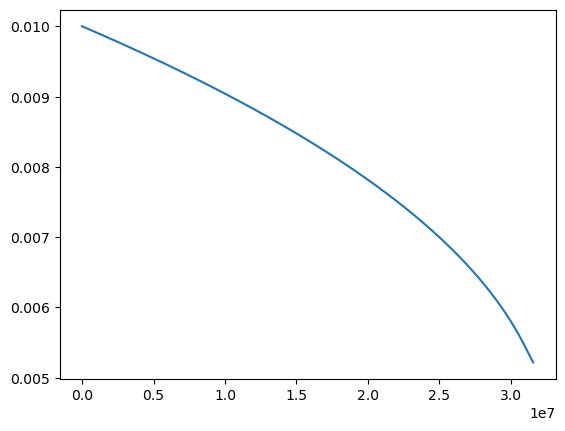

In [6]:
trajectory = traj(M,mu,a,p0,e0,Y0,Sigma0,SigmaPower,h0,Phi_phi0=0.,Phi_theta0=0.,Phi_r0=0.,err=1e-14,max_init_len=int(1e8))
plt.plot(trajectory[0],trajectory[2])

$1-\sigma$: 			 [6.41809705e+01 6.47893730e-03 8.69861859e-04 6.00150027e-03
 1.48167586e-01 2.73500133e-02 2.85734061e-02 5.15737017e+05
 4.39734107e-01 2.68472484e+00 1.22673924e-09 1.39228268e+03
 5.53605044e+02]


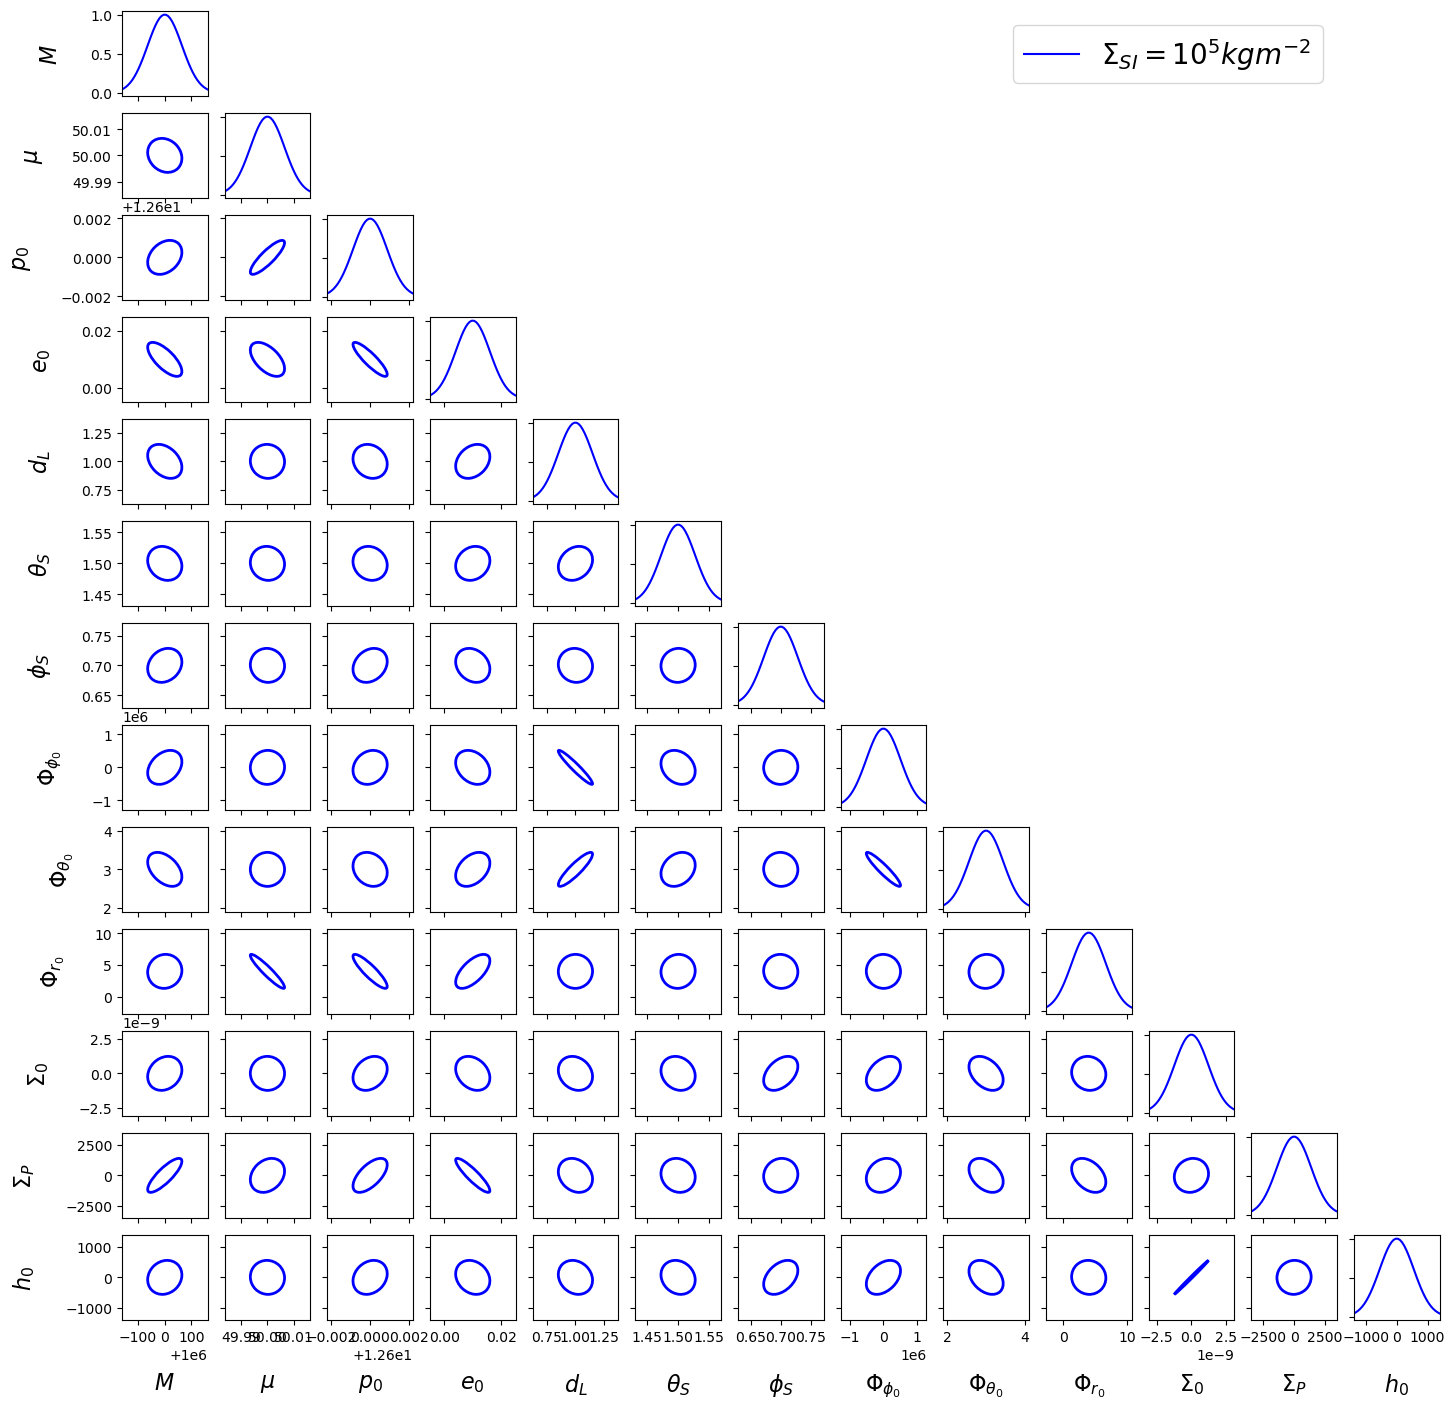

In [11]:
#Plotting

Fisher = np.loadtxt(f'TestRun_SubEcc/Fisher.txt')

#filename = 'pm_subdom_1'

param = {r'$M$':M,\
          r'$\mu$':mu,\
          #r'$a$':a,\
          r'$p_0$':p0,\
          r'$e_0$':e0,\
          #r'$Y_0$':Y0,\
          r'$\Sigma_0$':Sigma0,\
          r'$\Sigma_P$':SigmaPower,\
          r'$h_0$':h0,\
          r'$d_L$':dist,\
          r'$\theta_S$':qS,\
          r'$\phi_S$':phiS,\
          r'$\Phi_{\phi_0}$':Phi_phi0,\
          r'$\Phi_{\theta_0}$':Phi_theta0,\
          r'$\Phi_{r_0}$':Phi_r0,\
          #r'$\theta_K$':qK,\
          #r'$\phi_K$':phiK
        }


param_names = [r'$M$',r'$\mu$',#r'$a$',
               r'$p_0$',r'$e_0$',#r'$Y_0$',
               r'$d_L$',r'$\theta_S$',r'$\phi_S$',
               #r'$\theta_K$',
               #r'$\phi_K$',
               r'$\Phi_{\phi_0}$',r'$\Phi_{\theta_0}$',r'$\Phi_{r_0}$',
               r'$\Sigma_0$',r'$\Sigma_P$',r'$h_0$'
               ]
#paramaters

#######################################
### JOINT
#######################################

covariance = np.linalg.inv(Fisher)
print('$1-\sigma$: \t\t\t', np.sqrt(np.diag(covariance))) 

fig, axs = plt.subplots(len(param_names),len(param_names),figsize=(17,17))

#first param index
for i in range(len(param_names)):
    #second param index
    for j in range(i,len(param_names)):
        
        if i != j:
            cov = np.array(((covariance[i][i],covariance[i][j]),(covariance[j][i],covariance[j][j])))
            #print(cov)
            mean = np.array((param[param_names[i]],param[param_names[j]]))

            cov_ellipse(mean,cov,axs[j,i],lw=2,edgecolor='blue')

            #custom setting the x-y lim for each plot
            axs[j,i].set_xlim([param[param_names[i]]-2.5*np.sqrt(covariance[i][i]), param[param_names[i]]+2.5*np.sqrt(covariance[i][i])])
            axs[j,i].set_ylim([param[param_names[j]]-2.5*np.sqrt(covariance[j][j]), param[param_names[j]]+2.5*np.sqrt(covariance[j][j])])

            axs[j,i].set_xlabel(param_names[i],labelpad=20,fontsize=16)
            axs[j,i].set_ylabel(param_names[j],labelpad=20,fontsize=16)

        else:
            mean = param[param_names[i]]
            var = covariance[i][i]
            
            x = np.linspace(mean-3*np.sqrt(var),mean+3*np.sqrt(var))
            
            axs[j,i].plot(x,normal(mean,var,x),c='blue')
            axs[j,i].set_xlim([param[param_names[i]]-2.5*np.sqrt(covariance[i][i]), param[param_names[i]]+2.5*np.sqrt(covariance[i][i])])
            axs[j,i].set_xlabel(param_names[i],labelpad=20,fontsize=16)
            if i == j and j == 0:
                axs[j,i].set_ylabel(param_names[i],labelpad=20,fontsize=16)
    
    
for ax in fig.get_axes():
    ax.label_outer()
    
for i in range(len(param_names)):
    for j in range(i+1,len(param_names)):
        axs[i,j].axis('off')  # command for hiding the axis.
                
from matplotlib.lines import Line2D

axs[0,len(param_names)-2].legend([Line2D([0],[0],c='b'),
               #Line2D([0],[0],c='r'),
            #Line2D([0],[0],c='g'),
            #Line2D([0],[0],c='k'),
            #Line2D([0],[0],c='y'),
            #Line2D([0],[0],c='b'),
            #Line2D([0],[0],c='y')
                                 ],
           [r'$\Sigma_{SI} = 10^5 kgm^{-2}$',
            #r'($N_\delta = 8, n_{\rm{order}} = 2$) GitHub',
            #r'Extrinsic Sparse err = 5e-12 ($N_\delta = 8, n_{\rm{order}} = 2$) T = 289 sec',
            #r'$N_\delta = 8, n_{\rm{order}} = 4$',
            #r'$N_\delta = 8, n_{\rm{order}} = 2$, T ~ 1353 sec',
            #r'Dynamic Delta ($N_\delta = 8, n_{\rm{order}} = 2$) T ~ 890 sec',
            #r'Extrinsic Sparse ($N_\delta = 8, n_{\rm{order}} = 2$)'

            #'vacuum only'
           ],loc=1,fontsize=20)

plt.savefig('TestRun_SubEcc/Covariance.png',dpi=300,bbox_inches='tight')